# Google Cloud CMIP6 Public Data: Basic Python Example

This notebooks shows how to query the catalog and load the data using python

In [10]:
! pip install --upgrade xarray zarr gcsfs cftime nc-time-axis

In [11]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import zarr

xr.set_options(display_style='html')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [12]:
plt.rcParams['figure.figsize'] = 12, 6

## Browse Catalog

The data catatalog is stored as a CSV file. Here we read it with Pandas.

In [13]:
df = pd.read_csv('/Users/holim/code/dsc106/project03/cmip6-zarr-consolidated-stores.csv')
df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706


The columns of the dataframe correspond to the CMI6 controlled vocabulary. A beginners' guide to these terms is available in [this document](https://docs.google.com/document/d/1yUx6jr9EdedCOLd--CPdTfGDwEwzPpCF6p1jRmqx-0Q).

Here we filter the data to find monthly surface air temperature for historical experiments.

In [14]:
df_ta = df.query("activity_id=='CMIP' & table_id == 'Amon' & variable_id == 'tas' & experiment_id == 'historical'")
df_ta

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
973,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r3i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...,NaN,20180701
1766,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r2i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...,NaN,20180701
8074,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/histo...,NaN,20180701
22185,CMIP,IPSL,IPSL-CM6A-LR,historical,r8i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/histor...,NaN,20180803
22298,CMIP,IPSL,IPSL-CM6A-LR,historical,r2i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/histor...,NaN,20180803
...,...,...,...,...,...,...,...,...,...,...,...
522952,CMIP,MRI,MRI-ESM2-0,historical,r7i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/MRI/MRI-ESM2-0/historica...,NaN,20210813
523274,CMIP,MRI,MRI-ESM2-0,historical,r6i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/MRI/MRI-ESM2-0/historica...,NaN,20210907
523712,CMIP,CMCC,CMCC-CM2-SR5,historical,r3i1p2f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/CMCC/CMCC-CM2-SR5/histor...,NaN,20211108
523721,CMIP,CMCC,CMCC-CM2-SR5,historical,r2i1p2f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/CMCC/CMCC-CM2-SR5/histor...,NaN,20211109


Now we do further filtering to find just the models from NCAR.

In [15]:
df_ta_ncar = df_ta.query('institution_id == "NCAR"')
df_ta_ncar

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
56049,CMIP,NCAR,CESM2-WACCM,historical,r2i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2-WACCM/histori...,NaN,20190227
56143,CMIP,NCAR,CESM2-WACCM,historical,r3i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2-WACCM/histori...,NaN,20190227
56326,CMIP,NCAR,CESM2-WACCM,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2-WACCM/histori...,NaN,20190227
59875,CMIP,NCAR,CESM2,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190308
61655,CMIP,NCAR,CESM2,historical,r4i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r4...,NaN,20190308
61862,CMIP,NCAR,CESM2,historical,r5i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r5...,NaN,20190308
62691,CMIP,NCAR,CESM2,historical,r2i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r2...,NaN,20190308
63131,CMIP,NCAR,CESM2,historical,r3i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r3...,NaN,20190308
63266,CMIP,NCAR,CESM2,historical,r6i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r6...,NaN,20190308
64615,CMIP,NCAR,CESM2,historical,r8i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r8...,NaN,20190311


**로컬 데이터 사용:**

이 노트북은 로컬에 다운로드한 CMIP6 데이터를 사용합니다. 
데이터가 로컬에 저장된 경로를 아래 Cell 12에서 설정하세요.


## Load Data

로컬에 저장된 Zarr 데이터를 로드합니다.

In [16]:
# 로컬 Zarr 데이터 경로 설정
# 아래 BASE_PATH를 로컬에 다운로드한 CMIP6 데이터의 절대 경로로 변경하세요
# 예: '/Users/holim/data/cmip6' 또는 '/path/to/your/cmip6/data'
BASE_PATH = '/Users/holim/data/cmip6'  # ← 여기에 로컬 데이터 경로 입력

# 카탈로그에서 선택된 데이터셋 경로 가져오기
zstore_path = df_ta_ncar.zstore.values[-1]

# gs://cmip6/ 제거하고 로컬 경로로 변환
# 예: gs://cmip6/CMIP6/CMIP/... -> BASE_PATH/CMIP6/CMIP/...
relative_path = zstore_path.replace('gs://cmip6/', '')
local_path = f"{BASE_PATH}/{relative_path}"

print(f"로컬 데이터 경로: {local_path}")

# 로컬 Zarr 스토어를 직접 열기
ds = xr.open_zarr(local_path, consolidated=True)
ds

로컬 데이터 경로: ./data/CMIP6/CMIP/NCAR/CESM2-FV2/historical/r2i1p1f1/Amon/tas/gn/v20200226/


FileNotFoundError: /Users/holim/code/dsc106/project03/data/CMIP6/CMIP/NCAR/CESM2-FV2/historical/r2i1p1f1/Amon/tas/gn/v20200226 does not exist

Plot a map from a specific date.

In [ ]:
ds.tas.sel(time='1950-01').squeeze().plot()

⚠️ 'ds' 변수가 정의되지 않았습니다. Cell 12를 먼저 실행하세요.


Create a timeseries of global-average surface air temperature. For this we need the area weighting factor for each gridpoint.

In [ ]:
df_area = df.query("variable_id == 'areacella' & source_id == 'CESM2'")
area_zstore_path = df_area.zstore.values[0]

# Cell 12에서 설정한 BASE_PATH 사용 (동일한 경로 사용)
# BASE_PATH가 정의되지 않았으면 여기에도 직접 입력
BASE_PATH = '/Users/holim/data/cmip6'  # Cell 12와 동일한 경로 사용

# gs://cmip6/ 제거하고 로컬 경로로 변환
area_relative_path = area_zstore_path.replace('gs://cmip6/', '')
area_local_path = f"{BASE_PATH}/{area_relative_path}"

print(f"Area 데이터 로컬 경로: {area_local_path}")

# 로컬 Zarr 스토어에서 직접 로드
ds_area = xr.open_zarr(area_local_path, consolidated=True)
ds_area

Using areacella zstore: gs://cmip6/CMIP6/CMIP/NCAR/CESM2/amip/r1i1p1f1/fx/areacella/gn/v20190218/


_request out of retries on exception: Cannot connect to host storage.googleapis.com:443 ssl:True [SSLCertVerificationError: (1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1035)')]
Traceback (most recent call last):
  File "/Users/holim/code/dsc106/project03/dsc106-venv/lib/python3.13/site-packages/aiohttp/connector.py", line 1283, in _wrap_create_connection
    return await self._loop.create_connection(*args, **kwargs, sock=sock)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/asyncio/base_events.py", line 1201, in create_connection
    transport, protocol = await self._create_connection_transport(
                          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    ...<2 lines>...
        ssl_shutdown_timeout=ssl_shutdown_timeout)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.frame

ClientConnectorCertificateError: Cannot connect to host storage.googleapis.com:443 ssl:True [SSLCertVerificationError: (1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1035)')]

_request out of retries on exception: Cannot connect to host storage.googleapis.com:443 ssl:True [SSLCertVerificationError: (1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1035)')]
Traceback (most recent call last):
  File "/Users/holim/code/dsc106/project03/dsc106-venv/lib/python3.13/site-packages/aiohttp/connector.py", line 1283, in _wrap_create_connection
    return await self._loop.create_connection(*args, **kwargs, sock=sock)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/asyncio/base_events.py", line 1201, in create_connection
    transport, protocol = await self._create_connection_transport(
                          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    ...<2 lines>...
        ssl_shutdown_timeout=ssl_shutdown_timeout)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.frame

_request out of retries on exception: Cannot connect to host storage.googleapis.com:443 ssl:True [SSLCertVerificationError: (1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1035)')]
Traceback (most recent call last):
  File "/Users/holim/code/dsc106/project03/dsc106-venv/lib/python3.13/site-packages/aiohttp/connector.py", line 1283, in _wrap_create_connection
    return await self._loop.create_connection(*args, **kwargs, sock=sock)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/asyncio/base_events.py", line 1201, in create_connection
    transport, protocol = await self._create_connection_transport(
                          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    ...<2 lines>...
        ssl_shutdown_timeout=ssl_shutdown_timeout)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.frame

In [ ]:
total_area = ds_area.areacella.sum(dim=['lon', 'lat'])
ta_timeseries = (ds.tas * ds_area.areacella).sum(dim=['lon', 'lat']) / total_area
ta_timeseries

NameError: name 'ds_area' is not defined

By default the data are loaded lazily, as Dask arrays. Here we trigger computation explicitly.

In [ ]:
ta_timeseries.load()

<xarray.DataArray (time: 1980)>
array([285.6408 , 285.57397, 286.33856, ..., 288.6992 , 287.76303,
       287.0621 ], dtype=float32)
Coordinates:
  * time     (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00

Text(0.5, 1.0, 'Global Mean Surface Air Temperature')

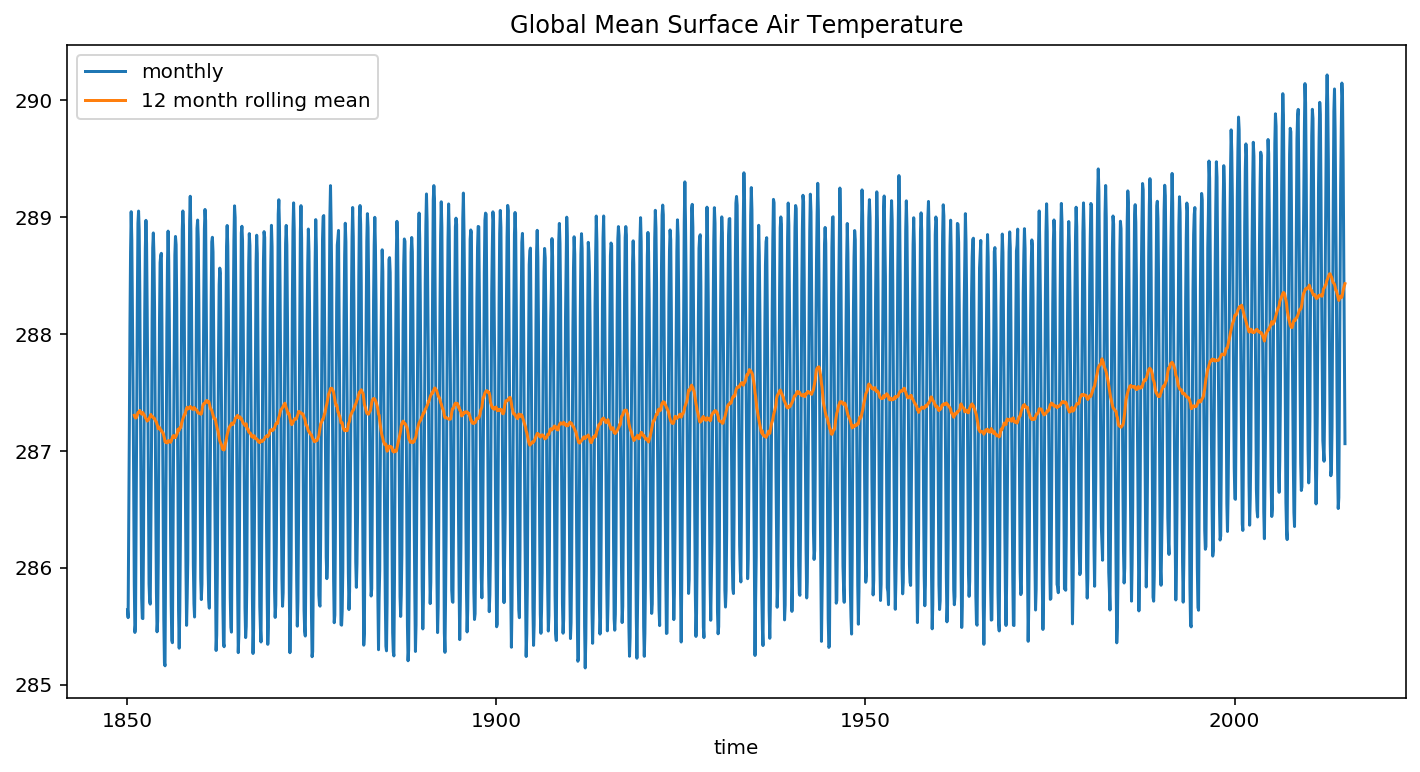

In [ ]:
ta_timeseries.plot(label='monthly')
ta_timeseries.rolling(time=12).mean().plot(label='12 month rolling mean')
plt.legend()
plt.title('Global Mean Surface Air Temperature')

## Export Data for D3 Visualizations

The following cells will export CSV files for the D3 visualizations in the `cmip6_d3_starter` folder.


In [ ]:
# Helper functions for data processing
import numpy as np
import pandas as pd
import os

def to_monthly_df(ta_timeseries):
    """Convert to a tidy DataFrame with columns: time, temp_c, year, month"""
    # Convert from Kelvin to Celsius if needed (CMIP6 data is usually in Kelvin)
    if ta_timeseries.values.mean() > 100:  # Heuristic: if mean > 100, likely Kelvin
        ta_timeseries = ta_timeseries - 273.15
    da = ta_timeseries.rename("temp_c")
    df = da.to_series().reset_index()
    df["year"] = df["time"].dt.year
    df["month"] = df["time"].dt.month
    return df

def pick_baseline(df, start=1850, end=1900):
    """Pick baseline period; if not available, fall back to 1961-1990."""
    base = df[(df["year"] >= start) & (df["year"] <= end)]
    if base.empty:
        base = df[(df["year"] >= 1961) & (df["year"] <= 1990)]
    return base

def monthly_anomaly(df, base_start=1850, base_end=1900):
    """Compute monthly anomaly using month-wise baseline means."""
    base = pick_baseline(df, base_start, base_end)
    clim = base.groupby("month")["temp_c"].mean().rename("clim_c").reset_index()
    out = df.merge(clim, on="month", how="left")
    out["anom_c"] = out["temp_c"] - out["clim_c"]
    return out

def annual_from_monthly(df):
    """Annual mean from monthly temp or anomalies; expects 'year' and a value column."""
    # If both temp_c and anom_c exist, prefer anom_c for stripes/milestone
    val_col = "anom_c" if "anom_c" in df.columns else "temp_c"
    annual = (df.groupby("year")[val_col].mean().rename(val_col).reset_index())
    return annual

def add_decade_label(year):
    return int(year // 10 * 10)

def rolling_mean_annual(annual_df, window=11, col="anom_c"):
    """Centered rolling mean on annual anomalies; min_periods to avoid NaNs at edges."""
    out = annual_df.copy()
    out[f"roll{window}_{col}"] = out[col].rolling(window=window, min_periods=window//2).mean()
    return out

print("Helper functions defined!")


Helper functions defined!


In [ ]:
# Convert ta_timeseries to monthly dataframe
df_m = to_monthly_df(ta_timeseries)
print(f"Monthly data shape: {df_m.shape}")
print(f"Year range: {df_m['year'].min()} - {df_m['year'].max()}")
df_m.head()


NameError: name 'ta_timeseries' is not defined

In [ ]:
# Compute monthly anomalies
df_ma = monthly_anomaly(df_m, base_start=1850, base_end=1900)
print(f"Monthly anomalies computed. Baseline period used: 1850-1900 (or 1961-1990 if not available)")
df_ma.head()


In [ ]:
# 1) Annual anomalies (for stripes / milestone)
annual_anom = annual_from_monthly(df_ma)  # columns: year, anom_c
print(f"Annual anomalies shape: {annual_anom.shape}")
annual_anom.head()


In [ ]:
# 2) Seasonality by decade (monthly means per decade)
tmp = df_ma.copy()
tmp["decade"] = tmp["year"].apply(add_decade_label)
seasonality_dec = tmp.groupby(["decade","month"])["anom_c"].mean().reset_index()  # use anomalies
print(f"Seasonality by decade shape: {seasonality_dec.shape}")
seasonality_dec.head()


In [ ]:
# 3) Mean-Variance by decade
mv_dec = tmp.groupby("decade")["anom_c"].agg(mean_c="mean", std_c="std").reset_index()
print(f"Mean-Variance by decade shape: {mv_dec.shape}")
mv_dec.head()


In [ ]:
# 4) Rolling-mean milestone series (11-year window)
annual_roll = rolling_mean_annual(annual_anom, window=11, col="anom_c")
print(f"Rolling mean shape: {annual_roll.shape}")
annual_roll.head()


## Interactive D3.js Visualizations in Notebook

Below are 6 interactive visualizations using D3.js that can be viewed directly in this notebook. Each visualization includes interactive features such as brushing, zooming, filtering, or tooltips.


In [ ]:
# Visualization 1: Time Series with Brush Selection
# Interactive line chart with brush for selecting time range

from IPython.display import HTML
import json

# Prepare data
annual_data = annual_anom.to_dict('records')

html_content = f"""
<!DOCTYPE html>
<html>
<head>
    <script src="https://d3js.org/d3.v7.min.js"></script>
    <style>
        body {{ font-family: Arial, sans-serif; }}
        .brush {{ fill: rgba(0,0,0,0.1); stroke: #333; }}
        .brush .selection {{ fill: rgba(100,150,255,0.2); stroke: #0066ff; }}
    </style>
</head>
<body>
    <div id="viz1"></div>
    <script>
        const data = {json.dumps(annual_data)};
        const width = 800, height = 400;
        const margin = {{top: 20, right: 30, bottom: 60, left: 60}};
        
        const svg = d3.select("#viz1")
            .append("svg")
            .attr("width", width)
            .attr("height", height);
        
        const x = d3.scaleLinear()
            .domain(d3.extent(data, d => d.year))
            .range([margin.left, width - margin.right]);
        
        const y = d3.scaleLinear()
            .domain(d3.extent(data, d => d.anom_c)).nice()
            .range([height - margin.bottom, margin.top]);
        
        // Main line
        const line = d3.line()
            .x(d => x(d.year))
            .y(d => y(d.anom_c))
            .curve(d3.curveMonotoneX);
        
        svg.append("g")
            .attr("transform", `translate(0,${{height - margin.bottom}})`)
            .call(d3.axisBottom(x).tickFormat(d3.format("d")))
            .append("text")
            .attr("x", width/2)
            .attr("y", 40)
            .attr("fill", "black")
            .style("text-anchor", "middle")
            .text("Year");
        
        svg.append("g")
            .attr("transform", `translate(${{margin.left}},0)`)
            .call(d3.axisLeft(y))
            .append("text")
            .attr("transform", "rotate(-90)")
            .attr("y", -40)
            .attr("x", -height/2)
            .attr("fill", "black")
            .style("text-anchor", "middle")
            .text("Temperature Anomaly (°C)");
        
        const path = svg.append("path")
            .datum(data)
            .attr("fill", "none")
            .attr("stroke", "steelblue")
            .attr("stroke-width", 2)
            .attr("d", line);
        
        // Brush for selection
        const brush = d3.brushX()
            .extent([[margin.left, margin.top], [width - margin.right, height - margin.bottom]])
            .on("end", brushed);
        
        const brushG = svg.append("g")
            .attr("class", "brush")
            .call(brush);
        
        // Tooltip
        const tooltip = d3.select("body").append("div")
            .style("position", "absolute")
            .style("background", "rgba(0,0,0,0.8)")
            .style("color", "white")
            .style("padding", "8px")
            .style("border-radius", "4px")
            .style("pointer-events", "none")
            .style("opacity", 0);
        
        const dots = svg.selectAll("circle")
            .data(data)
            .enter().append("circle")
            .attr("cx", d => x(d.year))
            .attr("cy", d => y(d.anom_c))
            .attr("r", 3)
            .attr("fill", "steelblue")
            .on("mouseover", function(event, d) {{
                tooltip.transition().style("opacity", 1);
                tooltip.html(`Year: ${{d.year}}<br/>Anomaly: ${{d.anom_c.toFixed(3)}}°C`)
                    .style("left", (event.pageX + 10) + "px")
                    .style("top", (event.pageY - 10) + "px");
            }})
            .on("mouseout", function() {{
                tooltip.transition().style("opacity", 0);
            }});
        
        function brushed(event) {{
            if (!event.selection) return;
            const [x0, x1] = event.selection.map(x.invert);
            const selected = data.filter(d => d.year >= x0 && d.year <= x1);
            const avgAnom = d3.mean(selected, d => d.anom_c);
            const info = svg.append("text")
                .attr("x", width/2)
                .attr("y", 30)
                .attr("text-anchor", "middle")
                .style("font-size", "14px")
                .style("font-weight", "bold")
                .text(`Selected: ${{selected.length}} years, Avg: ${{avgAnom.toFixed(3)}}°C`);
            
            setTimeout(() => info.remove(), 3000);
        }}
    </script>
</body>
</html>
"""

HTML(html_content)


NameError: name 'annual_anom' is not defined

In [ ]:
# Visualization 2: Heatmap - Decade vs Month Anomalies
# Interactive heatmap showing temperature anomalies by decade and month

decade_monthly_data = seasonality_dec.to_dict('records')
decades = sorted(seasonality_dec['decade'].unique())
months = sorted(seasonality_dec['month'].unique())

html_content = f"""
<!DOCTYPE html>
<html>
<head>
    <script src="https://d3js.org/d3.v7.min.js"></script>
    <style>
        body {{ font-family: Arial, sans-serif; }}
        .cell {{ cursor: pointer; }}
        .cell:hover {{ stroke: #333; stroke-width: 2px; }}
    </style>
</head>
<body>
    <div id="viz2"></div>
    <script>
        const data = {json.dumps(decade_monthly_data)};
        const decades = {json.dumps(list(decades))};
        const months = {json.dumps(list(months))};
        const monthNames = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'];
        
        const width = 900, height = 500;
        const margin = {{top: 60, right: 30, bottom: 80, left: 80}};
        
        const svg = d3.select("#viz2")
            .append("svg")
            .attr("width", width)
            .attr("height", height);
        
        const x = d3.scaleBand()
            .domain(months)
            .range([margin.left, width - margin.right])
            .padding(0.05);
        
        const y = d3.scaleBand()
            .domain(decades)
            .range([margin.top, height - margin.bottom])
            .padding(0.05);
        
        const colorScale = d3.scaleSequential(d3.interpolateRdYlBu)
            .domain(d3.extent(data, d => d.anom_c).reverse());
        
        svg.append("g")
            .selectAll("rect")
            .data(data)
            .enter().append("rect")
            .attr("class", "cell")
            .attr("x", d => x(d.month))
            .attr("y", d => y(d.decade))
            .attr("width", x.bandwidth())
            .attr("height", y.bandwidth())
            .attr("fill", d => colorScale(d.anom_c))
            .on("mouseover", function(event, d) {{
                d3.select(this).attr("stroke", "#333").attr("stroke-width", 2);
                const tooltip = d3.select("body").append("div")
                    .style("position", "absolute")
                    .style("background", "rgba(0,0,0,0.9)")
                    .style("color", "white")
                    .style("padding", "8px")
                    .style("border-radius", "4px")
                    .style("pointer-events", "none")
                    .html(`Decade: ${{d.decade}}s<br/>Month: ${{monthNames[d.month-1]}}<br/>Anomaly: ${{d.anom_c.toFixed(3)}}°C`);
                tooltip.style("left", (event.pageX + 10) + "px")
                    .style("top", (event.pageY - 10) + "px");
            }})
            .on("mouseout", function() {{
                d3.select(this).attr("stroke", null).attr("stroke-width", null);
                d3.selectAll("div").filter(function() {{
                    return d3.select(this).style("position") === "absolute";
                }}).remove();
            }});
        
        svg.append("g")
            .attr("transform", `translate(${{margin.left}},0)`)
            .call(d3.axisLeft(y).tickFormat(d => d + "s"));
        
        svg.append("g")
            .attr("transform", `translate(0,${{height - margin.bottom}})`)
            .call(d3.axisBottom(x).tickFormat(d => monthNames[d-1]));
        
        // Title
        svg.append("text")
            .attr("x", width/2)
            .attr("y", 30)
            .attr("text-anchor", "middle")
            .style("font-size", "16px")
            .style("font-weight", "bold")
            .text("Temperature Anomaly by Decade and Month");
        
        // Legend
        const legendWidth = 300;
        const legendHeight = 20;
        const legend = svg.append("g")
            .attr("transform", `translate(${{width - margin.right - legendWidth}},${{margin.top}})`);
        
        const legendScale = d3.scaleLinear()
            .domain(d3.extent(data, d => d.anom_c))
            .range([0, legendWidth]);
        
        const legendAxis = d3.axisBottom(legendScale)
            .ticks(5)
            .tickFormat(d => d.toFixed(2));
        
        legend.append("g")
            .attr("transform", `translate(0,${{legendHeight}})`)
            .call(legendAxis);
        
        const defs = svg.append("defs");
        const gradient = defs.append("linearGradient")
            .attr("id", "gradient")
            .attr("x1", "0%")
            .attr("x2", "100%");
        
        const numStops = 10;
        for (let i = 0; i <= numStops; i++) {{
            const value = d3.extent(data, d => d.anom_c)[0] + 
                (d3.extent(data, d => d.anom_c)[1] - d3.extent(data, d => d.anom_c)[0]) * (i / numStops);
            gradient.append("stop")
                .attr("offset", `${{i * 100 / numStops}}%`)
                .attr("stop-color", colorScale(value));
        }}
        
        legend.append("rect")
            .attr("width", legendWidth)
            .attr("height", legendHeight)
            .style("fill", "url(#gradient)");
    </script>
</body>
</html>
"""

HTML(html_content)


In [ ]:
# Visualization 3: Mean vs Variance Scatter Plot with Year Filter
# Interactive scatter plot showing mean vs variance by decade with year selection

meanvar_data = mv_dec.to_dict('records')
annual_data_full = annual_anom.to_dict('records')

html_content = f"""
<!DOCTYPE html>
<html>
<head>
    <script src="https://d3js.org/d3.v7.min.js"></script>
    <style>
        body {{ font-family: Arial, sans-serif; }}
        .dot {{ cursor: pointer; }}
        .dot:hover {{ stroke: #333; stroke-width: 3px; }}
        .slider {{ width: 600px; margin: 20px auto; }}
    </style>
</head>
<body>
    <div id="slider-container" style="text-align: center; margin: 20px;">
        <label>Year Range: <span id="year-label">All</span></label>
        <div class="slider">
            <input type="range" id="yearSlider" min="1900" max="2020" value="2020" step="10">
        </div>
    </div>
    <div id="viz3"></div>
    <script>
        const meanvarData = {json.dumps(meanvar_data)};
        const annualData = {json.dumps(annual_data_full)};
        
        const width = 800, height = 500;
        const margin = {{top: 20, right: 30, bottom: 60, left: 80}};
        
        let selectedYear = 2020;
        
        const svg = d3.select("#viz3")
            .append("svg")
            .attr("width", width)
            .attr("height", height);
        
        const x = d3.scaleLinear()
            .domain(d3.extent(meanvarData, d => d.mean_c)).nice()
            .range([margin.left, width - margin.right]);
        
        const y = d3.scaleLinear()
            .domain(d3.extent(meanvarData, d => d.std_c)).nice())
            .range([height - margin.bottom, margin.top]);
        
        function updateChart() {{
            svg.selectAll("*").remove();
            
            const filtered = meanvarData.filter(d => d.decade <= selectedYear);
            
            svg.append("g")
                .attr("transform", `translate(0,${{height - margin.bottom}})`)
                .call(d3.axisBottom(x))
                .append("text")
                .attr("x", width/2)
                .attr("y", 40)
                .attr("fill", "black")
                .style("text-anchor", "middle")
                .text("Mean Anomaly (°C)");
            
            svg.append("g")
                .attr("transform", `translate(${{margin.left}},0)`)
                .call(d3.axisLeft(y))
                .append("text")
                .attr("transform", "rotate(-90)")
                .attr("y", -50)
                .attr("x", -height/2)
                .attr("fill", "black")
                .style("text-anchor", "middle")
                .text("Standard Deviation (°C)");
            
            const dots = svg.selectAll("circle")
                .data(filtered)
                .enter().append("circle")
                .attr("class", "dot")
                .attr("cx", d => x(d.mean_c))
                .attr("cy", d => y(d.std_c))
                .attr("r", 8)
                .attr("fill", "steelblue")
                .attr("opacity", 0.7)
                .on("mouseover", function(event, d) {{
                    d3.select(this).attr("r", 12).attr("opacity", 1);
                    const tooltip = d3.select("body").append("div")
                        .style("position", "absolute")
                        .style("background", "rgba(0,0,0,0.9)")
                        .style("color", "white")
                        .style("padding", "8px")
                        .style("border-radius", "4px")
                        .style("pointer-events", "none")
                        .html(`Decade: ${{d.decade}}s<br/>Mean: ${{d.mean_c.toFixed(3)}}°C<br/>Std: ${{d.std_c.toFixed(3)}}°C`);
                    tooltip.style("left", (event.pageX + 10) + "px")
                        .style("top", (event.pageY - 10) + "px");
                }})
                .on("mouseout", function() {{
                    d3.select(this).attr("r", 8).attr("opacity", 0.7);
                    d3.selectAll("div").filter(function() {{
                        return d3.select(this).style("position") === "absolute";
                    }}).remove();
                }});
            
            // Labels
            dots.append("title")
                .text(d => `${{d.decade}}s`);
            
            svg.append("text")
                .attr("x", width/2)
                .attr("y", 15)
                .attr("text-anchor", "middle")
                .style("font-size", "16px")
                .style("font-weight", "bold")
                .text(`Mean vs Variance by Decade (up to ${{selectedYear}})`);
        }}
        
        d3.select("#yearSlider")
            .on("input", function() {{
                selectedYear = +this.value;
                d3.select("#year-label").text(selectedYear === 2020 ? "All" : `≤ ${{selectedYear}}`);
                updateChart();
            }});
        
        updateChart();
    </script>
</body>
</html>
"""

HTML(html_content)


In [ ]:
# Visualization 4: Area Chart with Threshold Line
# Stacked area chart showing temperature anomalies with 1.5°C threshold line

html_content = f"""
<!DOCTYPE html>
<html>
<head>
    <script src="https://d3js.org/d3.v7.min.js"></script>
    <style>
        body {{ font-family: Arial, sans-serif; }}
        .area {{ fill: steelblue; opacity: 0.6; }}
        .area.above {{ fill: red; }}
        .area.below {{ fill: blue; }}
        .threshold {{ stroke: #ff6b6b; stroke-width: 2; stroke-dasharray: 5,5; }}
        .line {{ fill: none; stroke: #333; stroke-width: 2; }}
    </style>
</head>
<body>
    <div id="viz4"></div>
    <script>
        const data = {json.dumps(annual_data)};
        const threshold = 1.5;
        
        const width = 900, height = 400;
        const margin = {{top: 20, right: 30, bottom: 60, left: 60}};
        
        const svg = d3.select("#viz4")
            .append("svg")
            .attr("width", width)
            .attr("height", height);
        
        const x = d3.scaleLinear()
            .domain(d3.extent(data, d => d.year))
            .range([margin.left, width - margin.right]);
        
        const y = d3.scaleLinear()
            .domain([d3.min(data, d => Math.min(d.anom_c, 0)) - 0.5, 
                     d3.max(data, d => Math.max(d.anom_c, threshold)) + 0.5]).nice()
            .range([height - margin.bottom, margin.top]);
        
        // Zero line
        svg.append("line")
            .attr("x1", margin.left)
            .attr("x2", width - margin.right)
            .attr("y1", y(0))
            .attr("y2", y(0))
            .attr("stroke", "#666")
            .attr("stroke-width", 1)
            .attr("stroke-dasharray", "3,3");
        
        // Threshold line
        svg.append("line")
            .attr("class", "threshold")
            .attr("x1", margin.left)
            .attr("x2", width - margin.right)
            .attr("y1", y(threshold))
            .attr("y2", y(threshold));
        
        svg.append("text")
            .attr("x", width - margin.right - 10)
            .attr("y", y(threshold) - 5)
            .attr("text-anchor", "end")
            .style("font-size", "12px")
            .style("fill", "#ff6b6b")
            .text(`${threshold}°C Threshold`);
        
        // Area above zero
        const areaAbove = d3.area()
            .x(d => x(d.year))
            .y0(d => y(Math.max(0, d.anom_c)))
            .y1(d => y(d.anom_c))
            .curve(d3.curveMonotoneX);
        
        // Area below zero
        const areaBelow = d3.area()
            .x(d => x(d.year))
            .y0(d => y(0))
            .y1(d => y(Math.min(0, d.anom_c)))
            .curve(d3.curveMonotoneX);
        
        svg.append("path")
            .datum(data)
            .attr("class", "area above")
            .attr("d", areaAbove);
        
        svg.append("path")
            .datum(data)
            .attr("class", "area below")
            .attr("d", areaBelow);
        
        // Line
        const line = d3.line()
            .x(d => x(d.year))
            .y(d => y(d.anom_c))
            .curve(d3.curveMonotoneX);
        
        svg.append("path")
            .datum(data)
            .attr("class", "line")
            .attr("d", line);
        
        // Axes
        svg.append("g")
            .attr("transform", `translate(0,${{height - margin.bottom}})`)
            .call(d3.axisBottom(x).tickFormat(d3.format("d")))
            .append("text")
            .attr("x", width/2)
            .attr("y", 40)
            .attr("fill", "black")
            .style("text-anchor", "middle")
            .text("Year");
        
        svg.append("g")
            .attr("transform", `translate(${{margin.left}},0)`)
            .call(d3.axisLeft(y))
            .append("text")
            .attr("transform", "rotate(-90)")
            .attr("y", -40)
            .attr("x", -height/2)
            .attr("fill", "black")
            .style("text-anchor", "middle")
            .text("Temperature Anomaly (°C)");
        
        // Interactive dots
        const dots = svg.selectAll("circle")
            .data(data)
            .enter().append("circle")
            .attr("cx", d => x(d.year))
            .attr("cy", d => y(d.anom_c))
            .attr("r", 0)
            .attr("fill", d => d.anom_c > threshold ? "red" : d.anom_c > 0 ? "orange" : "blue")
            .on("mouseover", function(event, d) {{
                d3.select(this).attr("r", 5);
                const tooltip = d3.select("body").append("div")
                    .style("position", "absolute")
                    .style("background", "rgba(0,0,0,0.9)")
                    .style("color", "white")
                    .style("padding", "8px")
                    .style("border-radius", "4px")
                    .style("pointer-events", "none")
                    .html(`Year: ${{d.year}}<br/>Anomaly: ${{d.anom_c.toFixed(3)}}°C<br/>${{d.anom_c > threshold ? "⚠️ Above threshold!" : ""}}`);
                tooltip.style("left", (event.pageX + 10) + "px")
                    .style("top", (event.pageY - 10) + "px");
            }})
            .on("mouseout", function() {{
                d3.select(this).attr("r", 0);
                d3.selectAll("div").filter(function() {{
                    return d3.select(this).style("position") === "absolute";
                }}).remove();
            }});
        
        svg.append("text")
            .attr("x", width/2)
            .attr("y", 20)
            .attr("text-anchor", "middle")
            .style("font-size", "16px")
            .style("font-weight", "bold")
            .text("Temperature Anomaly Over Time with 1.5°C Threshold");
    </script>
</body>
</html>
"""

HTML(html_content)


In [ ]:
# Visualization 5: Radial Time Series (Spiral)
# Spiral chart showing monthly anomalies over time

spiral_data = df_ma[["year","month","anom_c"]].to_dict('records')
years = sorted(df_ma['year'].unique())

html_content = f"""
<!DOCTYPE html>
<html>
<head>
    <script src="https://d3js.org/d3.v7.min.js"></script>
    <style>
        body {{ font-family: Arial, sans-serif; }}
        .spiral-line {{ fill: none; stroke-width: 1.5; }}
        .spiral-line:hover {{ stroke-width: 3; }}
    </style>
</head>
<body>
    <div id="viz5"></div>
    <script>
        const data = {json.dumps(spiral_data)};
        const years = {json.dumps(list(years))};
        
        const width = 800, height = 800;
        const centerX = width / 2;
        const centerY = height / 2;
        const maxRadius = Math.min(width, height) / 2 - 50;
        
        const svg = d3.select("#viz5")
            .append("svg")
            .attr("width", width)
            .attr("height", height);
        
        const angleScale = d3.scaleLinear()
            .domain([0, 11])
            .range([0, 2 * Math.PI]);
        
        const radiusScale = d3.scaleLinear()
            .domain(d3.extent(years))
            .range([50, maxRadius]);
        
        const colorScale = d3.scaleSequential(d3.interpolateRdYlBu)
            .domain(d3.extent(data, d => d.anom_c).reverse());
        
        // Draw month spokes
        const monthNames = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'];
        for (let month = 0; month < 12; month++) {{
            const angle = angleScale(month);
            const x = centerX + Math.cos(angle) * maxRadius;
            const y = centerY + Math.sin(angle) * maxRadius;
            
            svg.append("line")
                .attr("x1", centerX)
                .attr("y1", centerY)
                .attr("x2", x)
                .attr("y2", y)
                .attr("stroke", "#ddd")
                .attr("stroke-width", 1);
            
            svg.append("text")
                .attr("x", centerX + Math.cos(angle) * (maxRadius + 20))
                .attr("y", centerY + Math.sin(angle) * (maxRadius + 20))
                .attr("text-anchor", "middle")
                .attr("alignment-baseline", "middle")
                .style("font-size", "12px")
                .text(monthNames[month]);
        }}
        
        // Draw year circles
        const yearStep = Math.floor((d3.max(years) - d3.min(years)) / 5);
        for (let i = 0; i <= 5; i++) {{
            const year = d3.min(years) + i * yearStep;
            if (year <= d3.max(years)) {{
                const radius = radiusScale(year);
                svg.append("circle")
                    .attr("cx", centerX)
                    .attr("cy", centerY)
                    .attr("r", radius)
                    .attr("fill", "none")
                    .attr("stroke", "#eee")
                    .attr("stroke-width", 1);
                
                svg.append("text")
                    .attr("x", centerX + radius + 5)
                    .attr("y", centerY)
                    .attr("text-anchor", "start")
                    .attr("alignment-baseline", "middle")
                    .style("font-size", "10px")
                    .text(year);
            }}
        }}
        
        // Group data by year
        const dataByYear = d3.group(data, d => d.year);
        
        dataByYear.forEach((values, year) => {{
            const sorted = values.sort((a, b) => a.month - b.month);
            const line = d3.lineRadial()
                .angle((d, i) => angleScale(d.month - 1))
                .radius(d => radiusScale(d.year) + d.anom_c * 10)
                .curve(d3.curveCardinalClosed);
            
            const path = svg.append("path")
                .datum(sorted)
                .attr("class", "spiral-line")
                .attr("d", line)
                .attr("stroke", d => colorScale(d3.mean(sorted, d => d.anom_c)))
                .attr("opacity", 0.6)
                .on("mouseover", function(event, d) {{
                    d3.select(this).attr("opacity", 1).attr("stroke-width", 3);
                    const tooltip = d3.select("body").append("div")
                        .style("position", "absolute")
                        .style("background", "rgba(0,0,0,0.9)")
                        .style("color", "white")
                        .style("padding", "8px")
                        .style("border-radius", "4px")
                        .style("pointer-events", "none")
                        .html(`Year: ${{year}}<br/>Avg Anomaly: ${{d3.mean(sorted, d => d.anom_c).toFixed(3)}}°C`);
                    tooltip.style("left", (event.pageX + 10) + "px")
                        .style("top", (event.pageY - 10) + "px");
                }})
                .on("mouseout", function() {{
                    d3.select(this).attr("opacity", 0.6).attr("stroke-width", 1.5);
                    d3.selectAll("div").filter(function() {{
                        return d3.select(this).style("position") === "absolute";
                    }}).remove();
                }});
        }});
        
        svg.append("text")
            .attr("x", centerX)
            .attr("y", height - 20)
            .attr("text-anchor", "middle")
            .style("font-size", "14px")
            .style("font-weight", "bold")
            .text("Monthly Temperature Anomalies (Spiral View)");
    </script>
</body>
</html>
"""

HTML(html_content)


In [ ]:
# Visualization 6: Multi-line Chart with Decade Highlighting
# Multiple lines showing different decades with interactive highlighting

decade_data = {}
for decade in sorted(seasonality_dec['decade'].unique()):
    decade_data[decade] = seasonality_dec[seasonality_dec['decade'] == decade].to_dict('records')

html_content = f"""
<!DOCTYPE html>
<html>
<head>
    <script src="https://d3js.org/d3.v7.min.js"></script>
    <style>
        body {{ font-family: Arial, sans-serif; }}
        .line {{ fill: none; stroke-width: 2; opacity: 0.3; cursor: pointer; }}
        .line.active {{ opacity: 1; stroke-width: 3; }}
        .legend-item {{ cursor: pointer; }}
        .legend-item:hover {{ opacity: 0.7; }}
    </style>
</head>
<body>
    <div id="viz6"></div>
    <script>
        const decadeData = {json.dumps(decade_data)};
        const decades = Object.keys(decadeData).map(Number).sort((a,b) => a-b);
        const monthNames = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'];
        
        const width = 900, height = 500;
        const margin = {{top: 20, right: 150, bottom: 60, left: 60}};
        
        const svg = d3.select("#viz6")
            .append("svg")
            .attr("width", width)
            .attr("height", height);
        
        const x = d3.scaleBand()
            .domain(d3.range(1, 13))
            .range([margin.left, width - margin.right])
            .padding(0.1);
        
        const y = d3.scaleLinear()
            .domain(d3.extent(Object.values(decadeData).flat(), d => d.anom_c)).nice()
            .range([height - margin.bottom, margin.top]);
        
        const colorScale = d3.scaleOrdinal(d3.schemeCategory10)
            .domain(decades);
        
        const line = d3.line()
            .x(d => x(d.month) + x.bandwidth() / 2)
            .y(d => y(d.anom_c))
            .curve(d3.curveMonotoneX);
        
        // Draw lines
        const lines = svg.selectAll(".line-group")
            .data(decades)
            .enter().append("g")
            .attr("class", "line-group");
        
        lines.append("path")
            .attr("class", "line")
            .attr("d", d => line(decadeData[d]))
            .attr("stroke", d => colorScale(d))
            .on("mouseover", function(event, decade) {{
                d3.select(this).classed("active", true);
                d3.selectAll(".line").filter(function() {{
                    return !d3.select(this).classed("active");
                }}).style("opacity", 0.1);
            }})
            .on("mouseout", function() {{
                d3.selectAll(".line").classed("active", false).style("opacity", 0.3);
            }});
        
        // Axes
        svg.append("g")
            .attr("transform", `translate(0,${{height - margin.bottom}})`)
            .call(d3.axisBottom(x).tickFormat((d, i) => monthNames[i]))
            .append("text")
            .attr("x", width/2)
            .attr("y", 40)
            .attr("fill", "black")
            .style("text-anchor", "middle")
            .text("Month");
        
        svg.append("g")
            .attr("transform", `translate(${{margin.left}},0)`)
            .call(d3.axisLeft(y))
            .append("text")
            .attr("transform", "rotate(-90)")
            .attr("y", -40)
            .attr("x", -height/2)
            .attr("fill", "black")
            .style("text-anchor", "middle")
            .text("Temperature Anomaly (°C)");
        
        // Legend
        const legend = svg.append("g")
            .attr("transform", `translate(${{width - margin.right + 20}}, ${{margin.top}})`);
        
        const legendItems = legend.selectAll(".legend-item")
            .data(decades)
            .enter().append("g")
            .attr("class", "legend-item")
            .attr("transform", (d, i) => `translate(0, ${{i * 20}})`)
            .on("click", function(event, decade) {{
                const line = svg.selectAll(".line").filter((d, i) => decades[i] === decade);
                const isActive = line.classed("active");
                line.classed("active", !isActive);
                if (!isActive) {{
                    d3.selectAll(".line").style("opacity", 0.1);
                    line.style("opacity", 1);
                }} else {{
                    d3.selectAll(".line").style("opacity", 0.3);
                }}
            }});
        
        legendItems.append("rect")
            .attr("width", 15)
            .attr("height", 15)
            .attr("fill", d => colorScale(d));
        
        legendItems.append("text")
            .attr("x", 20)
            .attr("y", 12)
            .style("font-size", "12px")
            .text(d => `${{d}}s`);
        
        svg.append("text")
            .attr("x", width/2)
            .attr("y", 15)
            .attr("text-anchor", "middle")
            .style("font-size", "16px")
            .style("font-weight", "bold")
            .text("Monthly Anomalies by Decade (Click legend to highlight)");
        
        // Tooltip
        const tooltip = d3.select("body").append("div")
            .style("position", "absolute")
            .style("background", "rgba(0,0,0,0.9)")
            .style("color", "white")
            .style("padding", "8px")
            .style("border-radius", "4px")
            .style("pointer-events", "none")
            .style("opacity", 0);
        
        lines.selectAll("circle")
            .data(d => decadeData[d].map(v => ({{...v, decade: d}})))
            .enter().append("circle")
            .attr("cx", d => x(d.month) + x.bandwidth() / 2)
            .attr("cy", d => y(d.anom_c))
            .attr("r", 0)
            .attr("fill", d => colorScale(d.decade))
            .on("mouseover", function(event, d) {{
                d3.select(this).attr("r", 5);
                tooltip.transition().style("opacity", 1);
                tooltip.html(`Decade: ${{d.decade}}s<br/>Month: ${{monthNames[d.month-1]}}<br/>Anomaly: ${{d.anom_c.toFixed(3)}}°C`)
                    .style("left", (event.pageX + 10) + "px")
                    .style("top", (event.pageY - 10) + "px");
            }})
            .on("mouseout", function() {{
                d3.select(this).attr("r", 0);
                tooltip.transition().style("opacity", 0);
            }});
    </script>
</body>
</html>
"""

HTML(html_content)


In [ ]:
# Save to CSV files in cmip6_d3_starter/data/ folder
output_dir = "cmip6_d3_starter/data"
os.makedirs(output_dir, exist_ok=True)

annual_anom.to_csv(f"{output_dir}/stripes.csv", index=False)  # columns: year, anom_c
df_ma[["year","month","anom_c"]].to_csv(f"{output_dir}/spiral_monthly_anom.csv", index=False)
seasonality_dec.to_csv(f"{output_dir}/decade_monthly.csv", index=False)
mv_dec.to_csv(f"{output_dir}/meanvar_by_decade.csv", index=False)
annual_roll[["year","roll11_anom_c"]].rename(columns={"roll11_anom_c":"rolling11_anom_c"}).to_csv(f"{output_dir}/milestone.csv", index=False)

print("✅ All CSV files exported successfully!")
print(f"📁 Files saved to: {output_dir}/")
print("   - stripes.csv")
print("   - spiral_monthly_anom.csv")
print("   - decade_monthly.csv")
print("   - meanvar_by_decade.csv")
print("   - milestone.csv")
